In [32]:
#I have imported four libaries. i had to import both seaborn and matplotbit externally because is was not 
#included in this enviroment 
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sarah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sarah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [34]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [36]:
#this tells us that there are no null in the dataset 
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [37]:
#Here I used the datetime function so that it is easier for pandas to recognise the date. 
#then I used the info function to confirm the datatype 
print(df['Date'].head())
df['Date'] = pd.to_datetime(df["Date"])
df.info()


0    21-07-2015
1    05-01-2015
2    19-09-2015
3    12-12-2015
4    01-02-2015
Name: Date, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\sarah\AppData\Local\Temp\ipykernel_12672\932972513.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df["Date"])


In [38]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [39]:
#Now I am creating a bar chart to show what are the most purchased items
item_counts = df['itemDescription'].value_counts()
print(item_counts)
top_15_items = item_counts.head(15)

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64


C:\Users\sarah\AppData\Local\Temp\ipykernel_12672\2043427772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_items.index, y=top_15_items.values, palette='viridis')


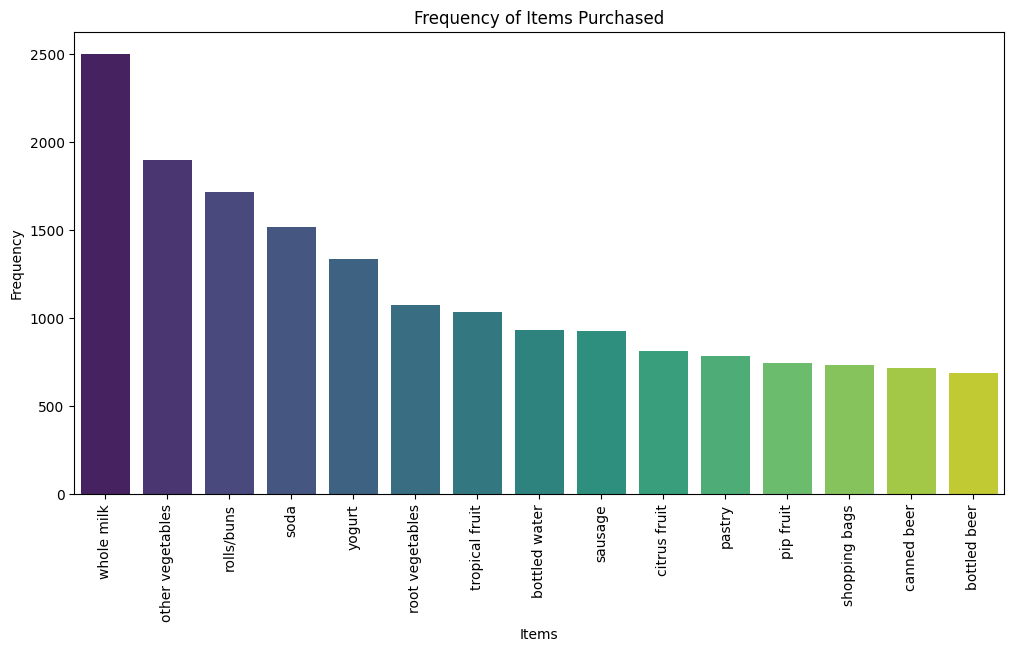

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_items.index, y=top_15_items.values, palette='viridis')
plt.title('Frequency of Items Purchased')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

In [41]:
#Any other grarps should so here/////

In [42]:
# Here I am grouping the data based on the the 'member number' and the 'date' so when both of these 
#categories match then  item descrptions will be put together.
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions.columns = ['Member_number', 'Date', 'Items']
transactions.head()

,Member_number,Date,Items
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


In [ ]:
#Here i am showing the number of purchases made each month 
transactions['Item_freq'] = transactions['Items'].apply(len)
transactions.tail()
transactions['Month'] = transactions['Date'].dt.to_period('M')
transactions.head()
transactions['Sales'] =
monthly_sales = transactions.groupby('Month').size().reset_index(name='Item_freq')
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Item_fr'], marker='o', linestyle='-')
plt.title('Number of Sales per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()



,Member_number,Date,Items,Item_freq,Month
0,1000,2014-06-24,"[whole milk, pastry, salty snack]",3,2014-06
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog...",4,2015-03
2,1000,2015-05-27,"[soda, pickled vegetables]",2,2015-05
3,1000,2015-07-24,"[canned beer, misc. beverages]",2,2015-07
4,1000,2015-11-25,"[sausage, hygiene articles]",2,2015-11


In [44]:
transactions.tail()

,Member_number,Date,Items,Item_freq
14958,4999,2015-05-16,"[butter milk, whipped/sour cream]",2
14959,4999,2015-12-26,"[bottled water, herbs]",2
14960,5000,2014-03-09,"[fruit/vegetable juice, onions]",2
14961,5000,2014-11-16,"[bottled beer, other vegetables]",2
14962,5000,2015-02-10,"[soda, root vegetables, semi-finished bread]",3
